In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Define the start and end dates for downloading historical data
start = '2003-01-01'
end = '2024-12-30'

# Specify the stock ticker symbol
stock = 'VALE'

# Download historical stock data using yfinance
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Reset index to make 'Date' a column in the DataFrame
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,2.416667,2.429167,2.405000,2.408333,0.895996,1266000
1,2003-01-03,2.408333,2.415833,2.385833,2.408333,0.895996,3025200
2,2003-01-06,2.433333,2.454167,2.415000,2.416667,0.899096,2779200
3,2003-01-07,2.412500,2.435833,2.408333,2.429167,0.903747,2565600
4,2003-01-08,2.412500,2.425000,2.333333,2.345833,0.872743,3720000
...,...,...,...,...,...,...,...
5371,2024-05-06,12.660000,12.730000,12.590000,12.590000,12.590000,17105300
5372,2024-05-07,12.800000,12.880000,12.690000,12.690000,12.690000,24043500
5373,2024-05-08,12.500000,12.620000,12.460000,12.550000,12.550000,18126800
5374,2024-05-09,12.400000,12.590000,12.370000,12.580000,12.580000,22622000


In [5]:
# Calculate 100-day and 200-day moving averages of the closing prices
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()

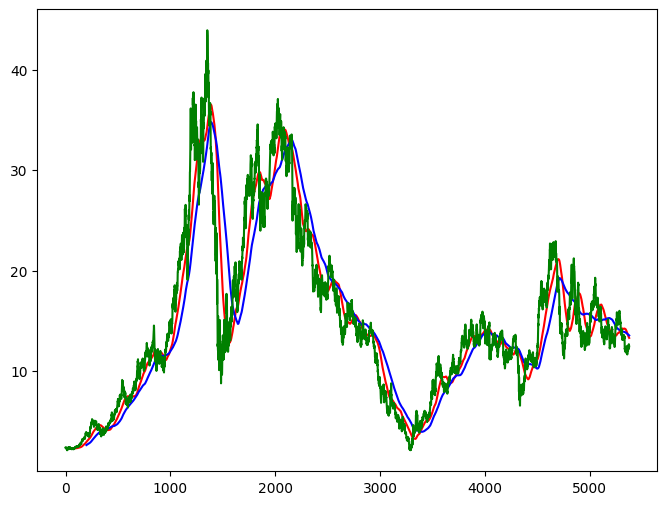

In [6]:
# Plotting the closing prices along with the moving averages
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
# Drop any rows with missing values (NaN) from the dataset
data.dropna(inplace=True)

In [8]:
# Splitting the data into training (80%) and testing (20%) sets
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [9]:
data_train.shape[0], data_test.shape[0]

(4300, 1076)

In [11]:
# Normalizing the training data using Min-Max scaling (scaling between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaled = scaler.fit_transform(data_train)

In [13]:
# Preparing the training data for LSTM modeling by creating sequences and targets
x = []
y = []

for i in range(100, data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i,0])

In [17]:
# Importing necessary libraries for LSTM modeling using Keras
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [18]:
# Converting sequences and targets to numpy arrays
x, y = np.array(x), np.array(y)

In [20]:
# Defining and building the LSTM model
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [21]:
# Compiling the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Training the LSTM model with the prepared data
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - loss: 0.0368
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 204ms/step - loss: 0.0054
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - loss: 0.0050
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 30s 224ms/step - loss: 0.0041
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 30s 228ms/step - loss: 0.0043
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 28s 211ms/step - loss: 0.0035
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - loss: 0.0036
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - loss: 0.0035
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - loss: 0.0035
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 201ms/step - loss: 0.0037
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 25s 192ms/step - loss: 0.0035
Epoch 12/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - loss: 0.0035
Epoch 13/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - loss: 0.0037
Epoch 14/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - loss: 0.0029
Epoch 15/50
132

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
# Extracting the last 100 days of training data for prediction continuity
pas_100_days = data_train.tail(100)

In [25]:
# Concatenating the last 100 days of training data with the test data
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [27]:
# Scaling the test data using the same scaler used for training data
data_test_scaled = scaler.fit_transform(data_test)

In [30]:
# Preparing the test data sequences and targets for prediction
x = []
y = []

for i in range(100, data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100:i]) # Sequences of 100 days (features)
    y.append(data_test_scaled[i,0]) # Target (next day's closing price)
    
# Converting sequences and targets to numpy arrays
x, y = np.array(x), np.array(y)

In [31]:
# Making predictions using the trained LSTM model
y_pred = model.predict(x)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


In [35]:
# Rescaling the predicted and actual prices back to their original scale
scale = 1/scaler.scale_
y_pred = y_pred*scale
y = y*scale

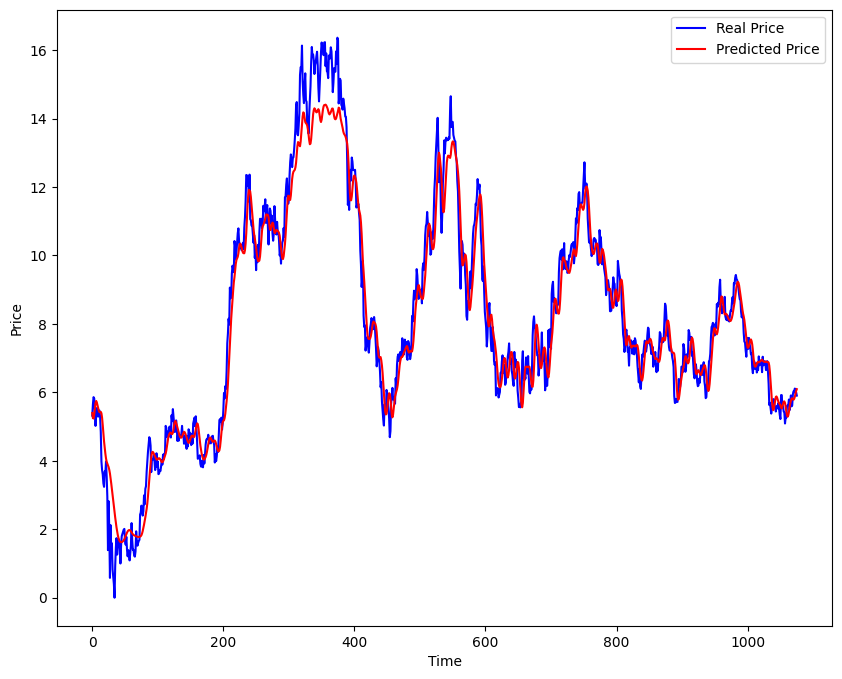

In [45]:
# Plotting the actual vs. predicted prices
plt.figure(figsize=(10,8))
plt.plot(y, 'b', label='Real Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



In [46]:
model.save('stcok_prediction.keras')